<a href="https://colab.research.google.com/github/Fernando21854/DataMining_Stroke_Data/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading Data


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder




stroke_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv')



In [63]:
stroke_data.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [64]:
stroke_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Observation from data above:

*  Based on the data we can see that the average age is 43 years old

*   Hypertension is relatively low 

*   Average glucose levels is >100 which is considered healthy

*   Heart disease and stroke averages are low, but continously increase based on age






In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


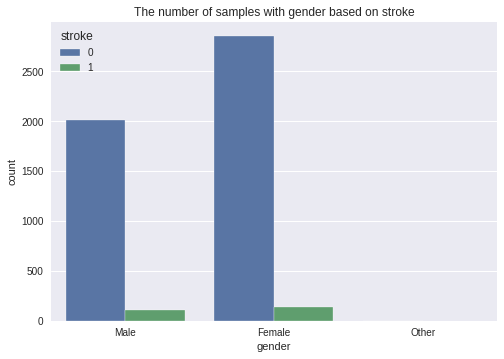

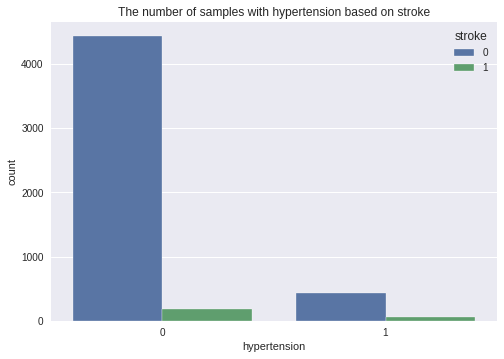

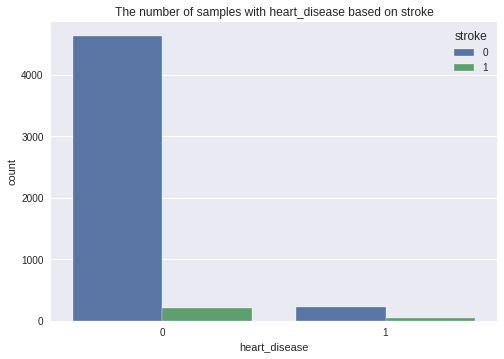

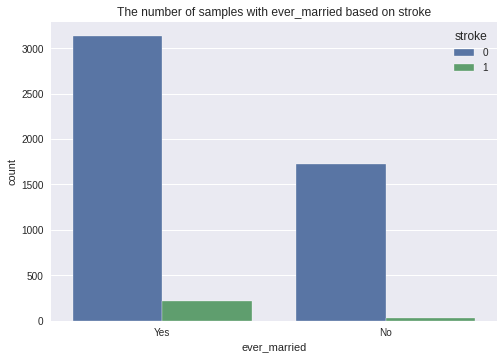

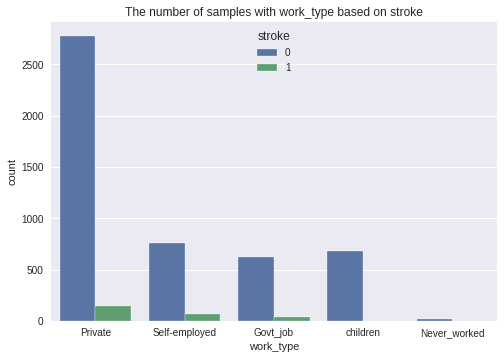

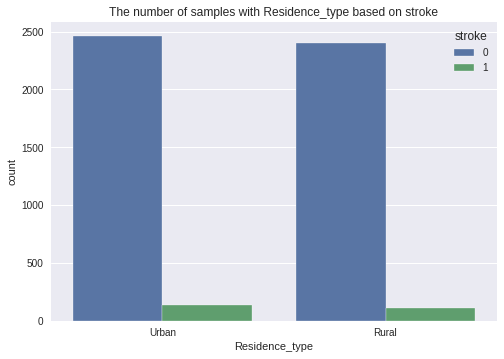

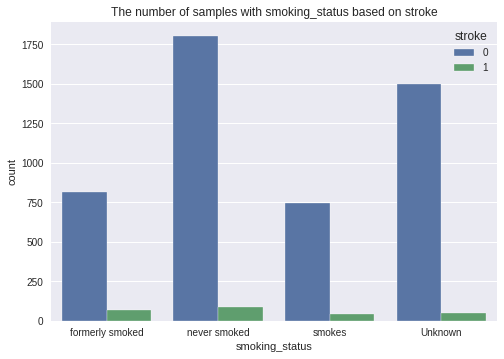

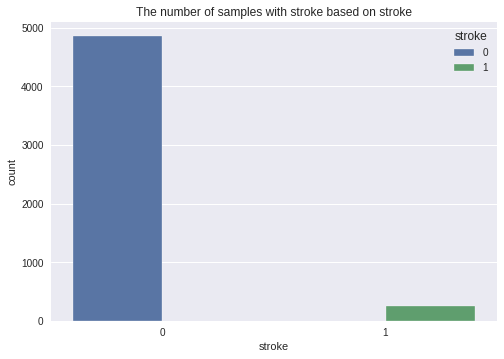

In [66]:
#loop to iterate through each column in the stroke_data 
for i in stroke_data.columns[1:]:
  #checks if data type is either "object" or "int64"
  if ( stroke_data[i].dtype == 'object') or (stroke_data[i].dtype == 'int64'):
    #create a countplot from seaborn library
    sns.countplot(data = stroke_data, x = i,hue='stroke')
    plt.title('The number of samples with {} based on stroke'.format(i))
    #display plot
    plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


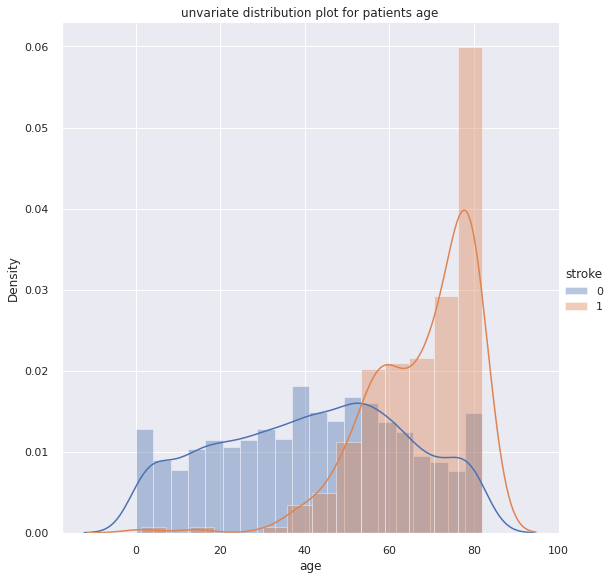

In [67]:
#sets the size of the figure for the plot using "rc params" from "seaborn library" 18,10 is width and height 
sns.set(rc={'figure.figsize':(18,10)})
#FacetGrid object that allows for the creation of multiple plots by categories and set height
#.map makes a histogram of the distribution of values in the age column and the add_legend shows the categories 
sns.FacetGrid(stroke_data, hue="stroke", height = 8).map(sns.distplot, "age").add_legend()
#sets the title of the plot to "univariate distribution plot for patients age
plt.title("unvariate distribution plot for patients age")
#display plot ***DONT FORGET PARENTHESES***
plt.show()

From the distribution plot we can see that the higher the age the higher chance they have of having a stroke. At around age 80 it is peak age of having a stroke. 


Text(0, 0.5, 'AGE')

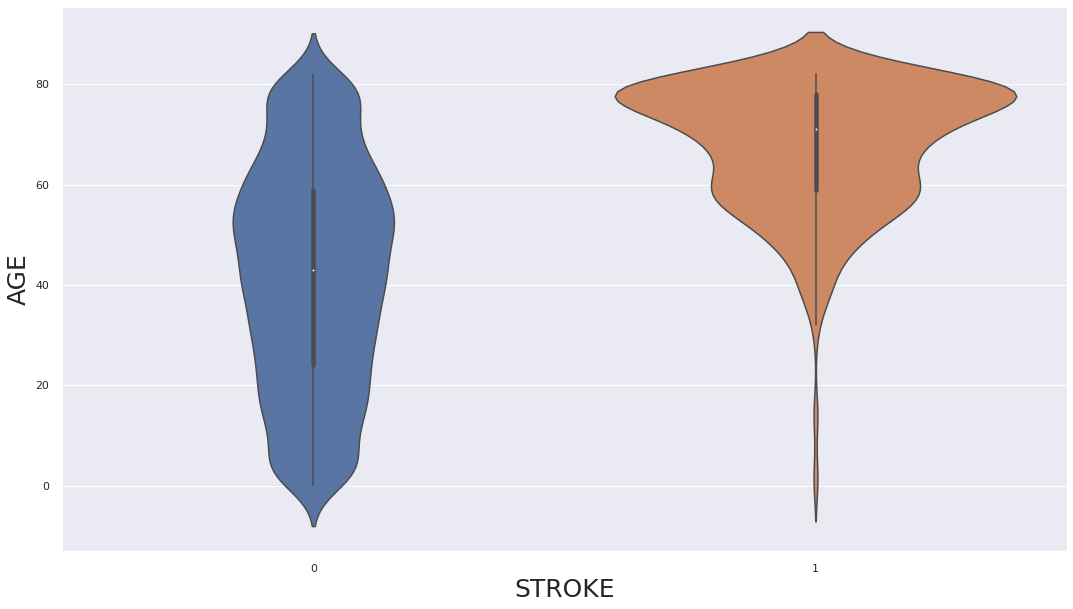

In [68]:
#set size of figure
sns.set(rc={'figure.figsize':(18,10)})
#use sns.violinplot with data and x and y 
seaborn_plot = sns.violinplot(data = stroke_data, x = "stroke", y = "age" )
#change label font size for better looking data
seaborn_plot.set_xlabel("STROKE", fontsize = 25)
seaborn_plot.set_ylabel("AGE", fontsize = 25)



According to this violin plot the likelihood of getting a stroke is around 75 to around 80 since it shows the highest.

**Is this dataset imbalanced?**
Yes, the data set is imbalanced because in our stroke data there is less percentage of people that get strokes between the rest of our categories. Due to having low numbers of people getting strokes we get an imbalanced data set.

Text(0.5, 1.0, 'Correlation HeatMap')

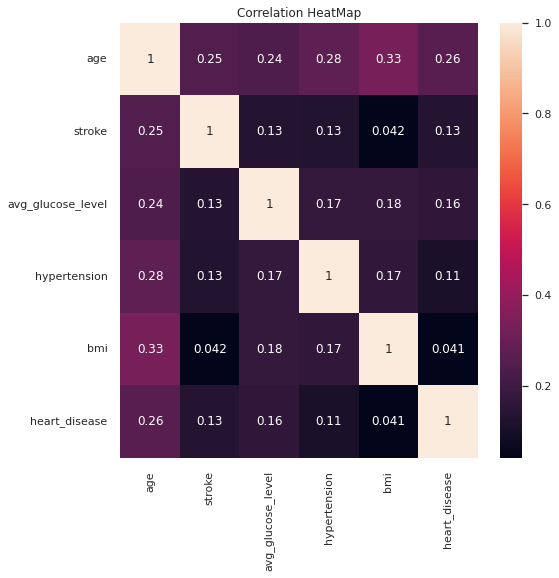

In [69]:
# use ax variable to assign the subplot object, then set width and height
fig, ax = plt.subplots(figsize=(8,8))
#use sns.heatmap to show a visualization of our data and get the correlation matrix between the columns
heatmap = sns.heatmap(stroke_data[["age", "stroke", "avg_glucose_level", "hypertension", "bmi", "heart_disease"]].corr(), vmax= 1, annot=True)
heatmap.set_title("Correlation HeatMap")

In [70]:
#see correlation of data for better understanding
stroke_data[1:].corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003806,0.003467,-0.000233,0.001782,0.003352,0.007527
age,0.003806,1.000000,0.276498,0.263415,0.237810,0.333256,0.244843
hypertension,0.003467,0.276498,1.000000,0.108763,0.174775,0.167892,0.128435
heart_disease,-0.000233,0.263415,0.108763,1.000000,0.160030,0.040565,0.131772
avg_glucose_level,0.001782,0.237810,0.174775,0.160030,1.000000,0.175102,0.129946
bmi,0.003352,0.333256,0.167892,0.040565,0.175102,1.000000,0.041525
stroke,0.007527,0.244843,0.128435,0.131772,0.129946,0.041525,1.000000


After closely observing the data we can see that there is a very strong correlation on the ages, glucose level, heart disease, and the bmi because they are closer to 1. The most obvious one is bmi and age that show a very strong correlation which we can see on the heatmap above. 

<AxesSubplot:xlabel='bmi'>

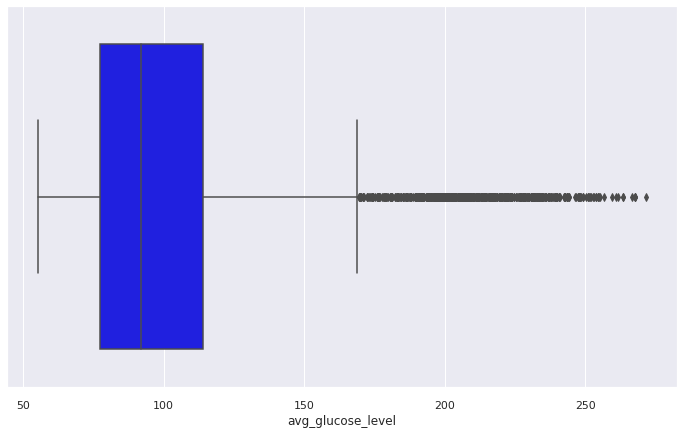

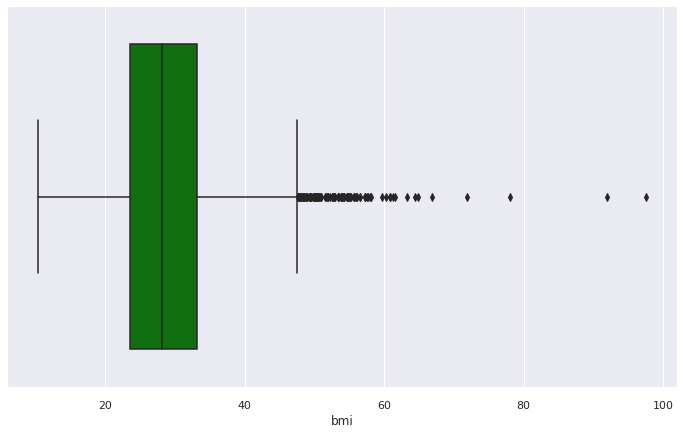

In [71]:
plt.figure(figsize = (12,7))
sns.boxplot(data=stroke_data, x = stroke_data["avg_glucose_level"], color="blue")


plt.figure(figsize = (12,7))
sns.boxplot(data = stroke_data, x = stroke_data["bmi"], color = "green")

In [72]:
avg_glucose_level = stroke_data.loc[stroke_data["avg_glucose_level"] > 160]
bmi_outliers = stroke_data.loc[stroke_data["bmi"] >50]
#filter data to remove outlier
mask = (stroke_data['avg_glucose_level'] >160) & (stroke_data['bmi'] > 50)

stroke_data[mask]



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
466,1307,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
595,39639,Female,46.0,0,0,Yes,Private,Rural,188.11,50.2,smokes,0
1061,8332,Female,50.0,0,0,Yes,Private,Rural,206.25,53.4,formerly smoked,0
1257,5821,Female,50.0,0,0,Yes,Private,Rural,217.39,50.6,Unknown,0
1322,35913,Female,55.0,1,0,Yes,Private,Urban,206.40,54.8,never smoked,0
1782,11412,Female,59.0,0,0,Yes,Private,Rural,234.82,51.8,never smoked,0


HANDLING NULL VALUES USING IMPUTATION

In [73]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputed_data = mean_imputer.fit_transform(stroke_data[['bmi']])
stroke_data['bmi'] = imputed_data
print(stroke_data['bmi'].isnull().sum())

0


In [74]:
stroke_data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**As we can see the BMI null values are now handled using the imputation method above**





In [75]:
stroke_data.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Transform variables that are object datatype using label encoder

In [76]:
LE = LabelEncoder()

#use a for loop to iterate through each column to transform
for column in stroke_data.select_dtypes(include=['object']):
    stroke_data[column] = LE.fit_transform(stroke_data[column])

stroke_data.dtypes





id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

Before we had a couple of object datatypes and now they were transformed using the label encoder library.


END OF PROJECT -- FERNANDO VARGAS 

Project 2- Build and evaluate four classification models with the data we have

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

sm = SMOTE(sampling_strategy=0.3, k_neighbors=5, random_state = 50)

X = stroke_data[['bmi', 'age', 'avg_glucose_level', 'smoking_status', 'Residence_type', 'gender', 'hypertension', 'ever_married', 'work_type', 'heart_disease']]
y = stroke_data['stroke']

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X, y)

print('After oversampling the shape of x_train{}'.format(X_train.shape))
print('After oversampling the shape of y_train{}'.format(y_train.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))


After oversampling the shape of x_train(9722, 10)
After oversampling the shape of y_train(9722,)
After OverSampling, counts of label '1': 4861
After OverSampling, counts of label '0': 4861


In [78]:
X_train

,bmi,age,avg_glucose_level,smoking_status,Residence_type,gender,hypertension,ever_married,work_type,heart_disease
0,36.600000,67.000000,228.690000,1,1,1,0,1,2,1
1,28.893237,61.000000,202.210000,2,0,0,0,1,3,0
2,32.500000,80.000000,105.920000,2,0,1,0,1,2,1
3,34.400000,49.000000,171.230000,3,1,0,0,1,2,0
4,24.000000,79.000000,174.120000,2,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...
9717,29.185466,63.529689,111.891582,1,0,1,0,1,2,0
9718,30.343137,72.799565,139.410676,1,0,1,0,1,2,0
9719,31.253100,77.486355,228.381636,1,0,0,0,1,2,0
9720,26.400000,57.723217,97.190938,2,0,0,0,1,2,0


              precision    recall  f1-score   support

           0       0.80      0.78      0.79       975
           1       0.78      0.81      0.80       970

    accuracy                           0.79      1945
   macro avg       0.79      0.79      0.79      1945
weighted avg       0.79      0.79      0.79      1945

0.7933161953727507


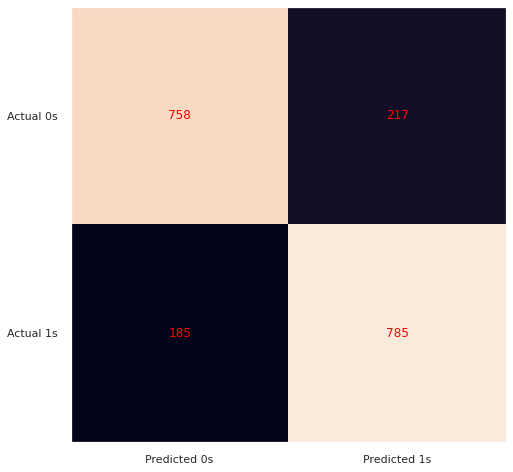

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000, random_state=32, solver='liblinear')
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))
print(logreg.score(X_test, y_test))


cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

predictions = gnb.predict(X_train)

print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      3886
           1       0.75      0.86      0.80      3891

    accuracy                           0.79      7777
   macro avg       0.79      0.79      0.79      7777
weighted avg       0.79      0.79      0.79      7777



In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

predictions = knn.predict(X_train)

print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      3886
           1       0.86      0.99      0.92      3891

    accuracy                           0.92      7777
   macro avg       0.93      0.92      0.92      7777
weighted avg       0.93      0.92      0.92      7777



In [82]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1,probability=True)
svm.fit(X_train, y_train)

predictions = svm.predict(X_train)

print(classification_report(y_train, predictions))


              precision    recall  f1-score   support

           0       0.82      0.77      0.80      3886
           1       0.79      0.84      0.81      3891

    accuracy                           0.81      7777
   macro avg       0.81      0.81      0.81      7777
weighted avg       0.81      0.81      0.81      7777



In [83]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



pred_prob1 = gnb.predict_proba(X_test)
pred_prob2=knn.predict_proba(X_test)
pred_prob3 = svm.predict_proba(X_test)
pred_prob4 = logreg.predict_proba(X_test)


In [84]:

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)



# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

# auc scores
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])


In [85]:


print(auc_score1, auc_score2,auc_score3, auc_score4)


0.8561956119481894 0.9476267512556172 0.8861866243721915 0.8857287866772403


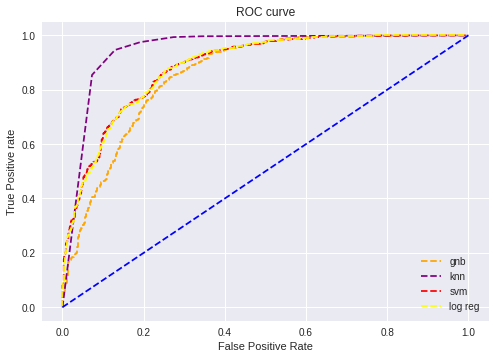

In [86]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='gnb')
plt.plot(fpr2, tpr2, linestyle='--',color='purple', label='knn')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='svm')
plt.plot(fpr4, tpr4, linestyle="--", color='yellow', label='log reg')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Based on my logistic regression graph the best one is k neighbors for accuracy.